In [3]:
#Import dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
import time
from datetime import datetime

In [4]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [6]:
#Import citipy 
from citipy import citipy

In [8]:
#Create a list holding the cities
cities = []

#Identify the nearest city for each latitiude and longitude combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
#Print the city count to confirm sufficient count
len(cities)
cities

['arraial do cabo',
 'cape town',
 'east london',
 'saskylakh',
 'yellowknife',
 'temyasovo',
 'port alfred',
 'hobyo',
 'mys shmidta',
 'new norfolk',
 'amderma',
 'jamestown',
 'tuatapere',
 'dunedin',
 'tiksi',
 'takoradi',
 'fortuna',
 'punta arenas',
 'albany',
 'mahajanga',
 'trinidad',
 'rudbar',
 'namibe',
 'lebu',
 'harper',
 'khuzdar',
 'waitati',
 'cherskiy',
 'malwan',
 'oksfjord',
 'inhambane',
 'sentyabrskiy',
 'saint george',
 'chuy',
 'mahebourg',
 'yulara',
 'avarua',
 'tuktoyaktuk',
 'bachaquero',
 'comodoro rivadavia',
 'poum',
 'bredasdorp',
 'jiwani',
 'carnarvon',
 'lavrentiya',
 'ushuaia',
 'lorengau',
 'waingapu',
 'severo-kurilsk',
 'grenaa',
 'svetlogorsk',
 'emba',
 'kavieng',
 'fort frances',
 'barentsburg',
 'qaanaaq',
 'hermanus',
 'warqla',
 'pemberton',
 'chokurdakh',
 'grand river south east',
 'vaitupu',
 'port lincoln',
 'kapaa',
 'sabzevar',
 'rikitea',
 'illoqqortoormiut',
 'guerrero negro',
 'novaya zaimka',
 'buariki',
 'strezhevoy',
 'kyren',
 'p

In [8]:
#Create an empty list to hold weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

#Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
#Indicate the Data Loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yumen
Processing Record 2 of Set 1 | yar-sale
Processing Record 3 of Set 1 | belaya gora
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | pietersburg
Processing Record 6 of Set 1 | port hardy
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 1 | si satchanalai
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | burnie
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | shingu
Processing Record 18 of Set 1 | fayaoue
Processing Record 19 of Set 1 | coahuayana
Processing Record 20 of Set 1 | kajaani
Processing Record 21 of Set 1 | vokhma
Processing Record 22 of Set 1 | duluth
Processi

Processing Record 35 of Set 4 | butaritari
Processing Record 36 of Set 4 | kilmallock
Processing Record 37 of Set 4 | asau
Processing Record 38 of Set 4 | oneida
Processing Record 39 of Set 4 | haizhou
Processing Record 40 of Set 4 | krasnoselkup
Processing Record 41 of Set 4 | natal
Processing Record 42 of Set 4 | bengkulu
Processing Record 43 of Set 4 | vysokopillya
Processing Record 44 of Set 4 | igualada
Processing Record 45 of Set 4 | babanusah
City not found. Skipping...
Processing Record 46 of Set 4 | saint george
Processing Record 47 of Set 4 | hirtshals
Processing Record 48 of Set 4 | wanning
Processing Record 49 of Set 4 | moyobamba
Processing Record 50 of Set 4 | amiens
Processing Record 1 of Set 5 | hofn
Processing Record 2 of Set 5 | jalu
Processing Record 3 of Set 5 | sarny
Processing Record 4 of Set 5 | atar
Processing Record 5 of Set 5 | emba
Processing Record 6 of Set 5 | coyaima
Processing Record 7 of Set 5 | lasa
Processing Record 8 of Set 5 | port elizabeth
Processi

Processing Record 27 of Set 8 | fomboni
Processing Record 28 of Set 8 | arlit
Processing Record 29 of Set 8 | mangai
Processing Record 30 of Set 8 | teya
Processing Record 31 of Set 8 | klyuchi
Processing Record 32 of Set 8 | sinnamary
Processing Record 33 of Set 8 | filadelfia
Processing Record 34 of Set 8 | naryan-mar
Processing Record 35 of Set 8 | shellbrook
Processing Record 36 of Set 8 | kuche
City not found. Skipping...
Processing Record 37 of Set 8 | assenede
Processing Record 38 of Set 8 | kudahuvadhoo
Processing Record 39 of Set 8 | kysyl-syr
Processing Record 40 of Set 8 | goya
Processing Record 41 of Set 8 | nanortalik
Processing Record 42 of Set 8 | samusu
City not found. Skipping...
Processing Record 43 of Set 8 | banyo
Processing Record 44 of Set 8 | tabialan
City not found. Skipping...
Processing Record 45 of Set 8 | aksu
Processing Record 46 of Set 8 | zolskaya
City not found. Skipping...
Processing Record 47 of Set 8 | port blair
Processing Record 48 of Set 8 | razole

Processing Record 13 of Set 12 | khuldabad
Processing Record 14 of Set 12 | xuddur
Processing Record 15 of Set 12 | iralaya
Processing Record 16 of Set 12 | waddan
Processing Record 17 of Set 12 | tungkang
City not found. Skipping...
Processing Record 18 of Set 12 | penapolis
Processing Record 19 of Set 12 | fatehpur
Processing Record 20 of Set 12 | camacupa
Processing Record 21 of Set 12 | sao felix do xingu
Processing Record 22 of Set 12 | kolda
Processing Record 23 of Set 12 | kourou
Processing Record 24 of Set 12 | beloha
Processing Record 25 of Set 12 | broken hill
Processing Record 26 of Set 12 | lovington
Processing Record 27 of Set 12 | diego de almagro
Processing Record 28 of Set 12 | tairua
Processing Record 29 of Set 12 | haimen
Processing Record 30 of Set 12 | maun
Processing Record 31 of Set 12 | vanavara
Processing Record 32 of Set 12 | shaoyang
Processing Record 33 of Set 12 | bridgetown
Processing Record 34 of Set 12 | karpathos
Processing Record 35 of Set 12 | vila fra

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url = url + "&q=" + city.replace(" ","+")
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': 18.4232, 'lat': -33.9258},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 64.31,
  'feels_like': 63.73,
  'temp_min': 62.11,
  'temp_max': 66.09,
  'pressure': 1013,
  'humidity': 70},
 'visibility': 10000,
 'wind': {'speed': 1.99, 'deg': 0, 'gust': 5.01},
 'clouds': {'all': 75},
 'dt': 1635713159,
 'sys': {'type': 2,
  'id': 2033665,
  'country': 'ZA',
  'sunrise': 1635651995,
  'sunset': 1635700386},
 'timezone': 7200,
 'id': 3369157,
 'name': 'Cape Town',
 'cod': 200}

In [9]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yumen,40.2833,97.2000,54.27,20,50,5.48,CN,2021-10-29 06:10:46
1,Yar-Sale,66.8333,70.8333,23.65,96,100,12.12,RU,2021-10-29 06:10:47
2,Belaya Gora,68.5333,146.4167,3.70,97,100,1.77,RU,2021-10-29 06:10:48
3,Busselton,-33.6500,115.3333,62.04,45,47,5.17,AU,2021-10-29 06:10:48
4,Pietersburg,-23.9045,29.4688,48.60,65,63,4.68,ZA,2021-10-29 06:10:50


In [10]:
#Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yumen,CN,2021-10-29 06:10:46,40.2833,97.2000,54.27,20,50,5.48
1,Yar-Sale,RU,2021-10-29 06:10:47,66.8333,70.8333,23.65,96,100,12.12
2,Belaya Gora,RU,2021-10-29 06:10:48,68.5333,146.4167,3.70,97,100,1.77
3,Busselton,AU,2021-10-29 06:10:48,-33.6500,115.3333,62.04,45,47,5.17
4,Pietersburg,ZA,2021-10-29 06:10:50,-23.9045,29.4688,48.60,65,63,4.68


In [11]:
#Create output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity= city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
#Get today's date in seconds
today = time.strftime("%x")
today

'10/28/21'

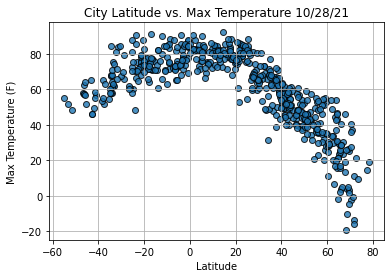

In [14]:
#Build scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure
plt.savefig("weather_data/Fig1.png")

plt.show()

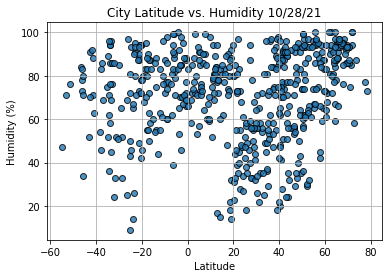

In [15]:
#Build scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure
plt.savefig("weather_data/Fig2.png")

plt.show()

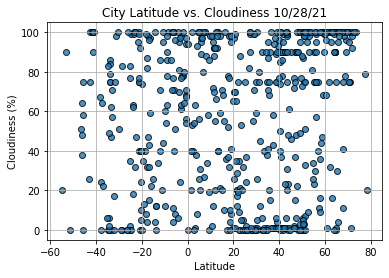

In [16]:
#Build scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure
plt.savefig("weather_data/Fig3.png")

plt.show()

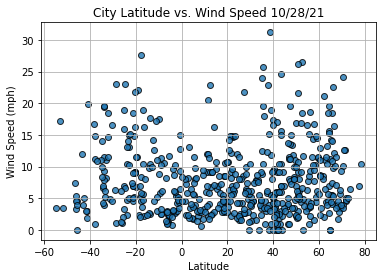

In [17]:
#Build scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure
plt.savefig("weather_data/Fig4.png")

plt.show()

In [24]:
#Import lineregress
from scipy.stats import linregress

#Create a function to create perform linear regression on weather data and plot a regression line and equation
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Create scatter plot and plot regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yumen,CN,2021-10-29 06:10:46,40.2833,97.2000,54.27,20,50,5.48
1,Yar-Sale,RU,2021-10-29 06:10:47,66.8333,70.8333,23.65,96,100,12.12
2,Belaya Gora,RU,2021-10-29 06:10:48,68.5333,146.4167,3.70,97,100,1.77
5,Port Hardy,CA,2021-10-29 06:10:50,50.6996,-127.4199,42.98,93,75,9.22
6,Sitka,US,2021-10-29 06:10:51,57.0531,-135.3300,40.89,75,75,11.50


In [26]:
#Create Northern and Southern hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

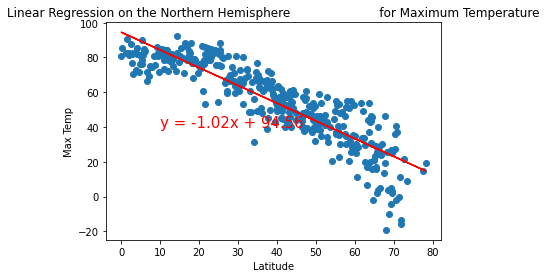

In [27]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature', 'Max Temp',(10,40))

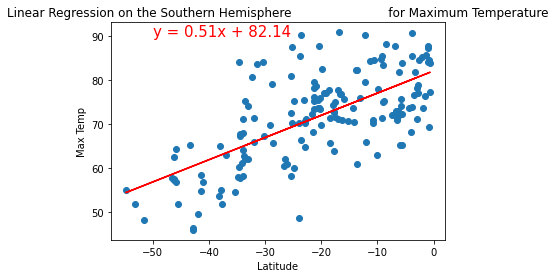

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

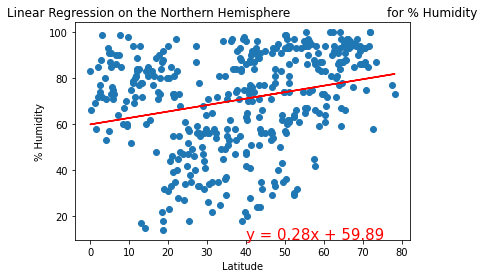

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

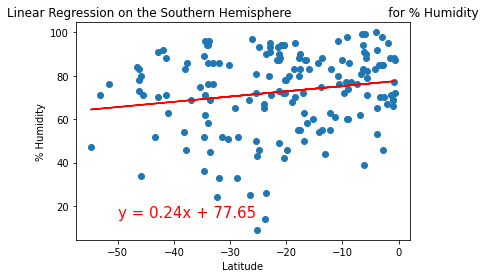

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

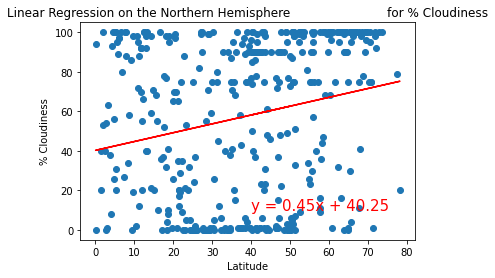

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

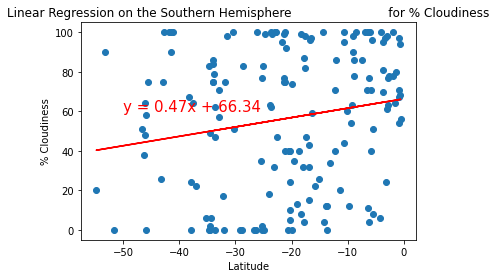

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

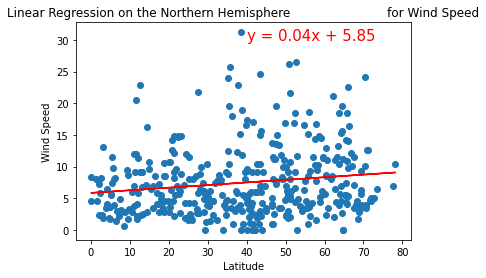

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

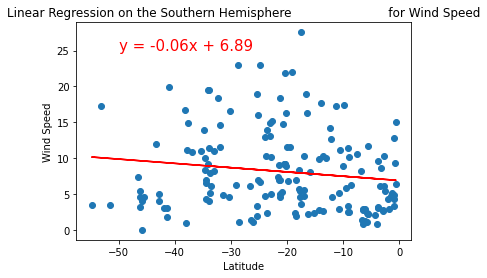

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))